In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# **Chia train test theo tỉ lệ 8:2**

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('BTC.csv')
df1=df.reset_index()['Close']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train, test
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [5]:
# 5. Hàm Create Dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [6]:
# 6. Reshape thành X=t,t+1,t+2..t+99  Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [8]:
# 8. Define SimpleRNN Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
23/23 [==============================] - 2s 34ms/step - loss: 0.0089 - val_loss: 0.0039
Epoch 2/100
23/23 [==============================] - 1s 32ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 3/100
23/23 [==============================] - 1s 38ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 4/100
23/23 [==============================] - 1s 36ms/step - loss: 8.8522e-04 - val_loss: 0.0015
Epoch 5/100
23/23 [==============================] - 1s 38ms/step - loss: 7.8151e-04 - val_loss: 0.0016
Epoch 6/100
23/23 [==============================] - 1s 37ms/step - loss: 7.2237e-04 - val_loss: 9.6176e-04
Epoch 7/100
23/23 [==============================] - 1s 22ms/step - loss: 6.0256e-04 - val_loss: 0.0011
Epoch 8/100
23/23 [==============================] - 1s 40ms/step - loss: 5.5209e-04 - val_loss: 0.0010
Epoch 9/100
23/23 [==============================] - 1s 22ms/step - loss: 5.1067e-04 - val_loss: 6.4587e-04
Epoch 10/100
23/23 [==============================] - 1s 27ms/step -

In [10]:
# 10. Dự báo dữ liệu train, test
train_predict = model.predict(X_train)
y_pred_test = model.predict(X_test)

9/9 [==============================] - 0s 7ms/step


In [11]:
# 11. Chuẩn hóa dữ liệu
train_predict = scaler.inverse_transform(train_predict)
y_pred_test = scaler.inverse_transform(y_pred_test)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [12]:
# 12. Đánh giá độ chính xác thuật toán
test_mae = mean_absolute_error(y_pred_test, y_test)
test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred_test, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 948.5460098839281
Testing RMSE: 1428.2761726354101
Testing MAPE: 0.02010398939575862


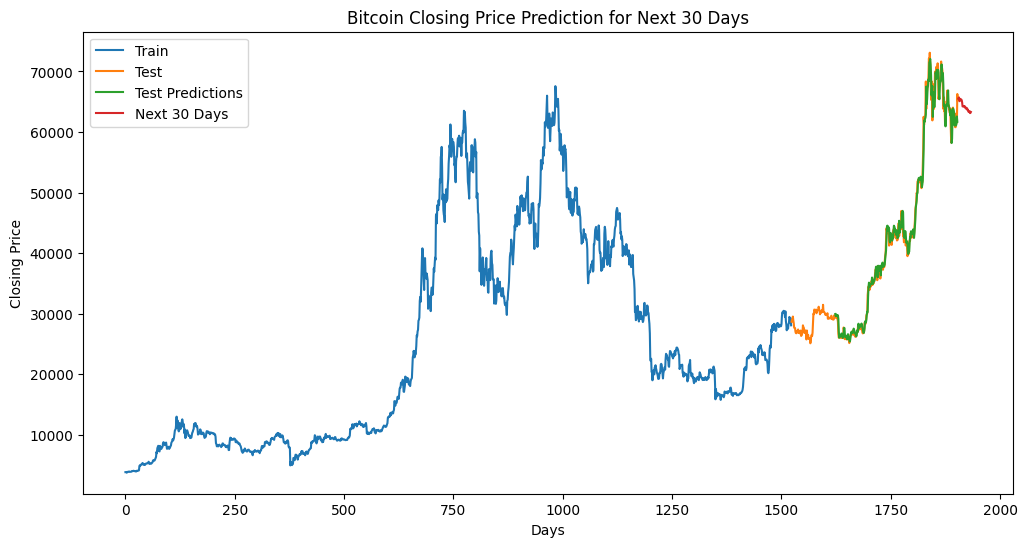

Predicted closing prices for the next 30 days:
[65487.76  65653.83  65693.836 65078.61  65207.785 65402.234 65264.91
 65359.08  65241.56  64877.836 64214.504 64247.062 64244.72  64241.492
 64131.473 64240.508 64091.473 63873.742 64012.89  63960.688 63931.695
 63651.594 63704.73  63392.5   63329.348 63407.195 63428.95  63113.54
 63143.473 63303.508]


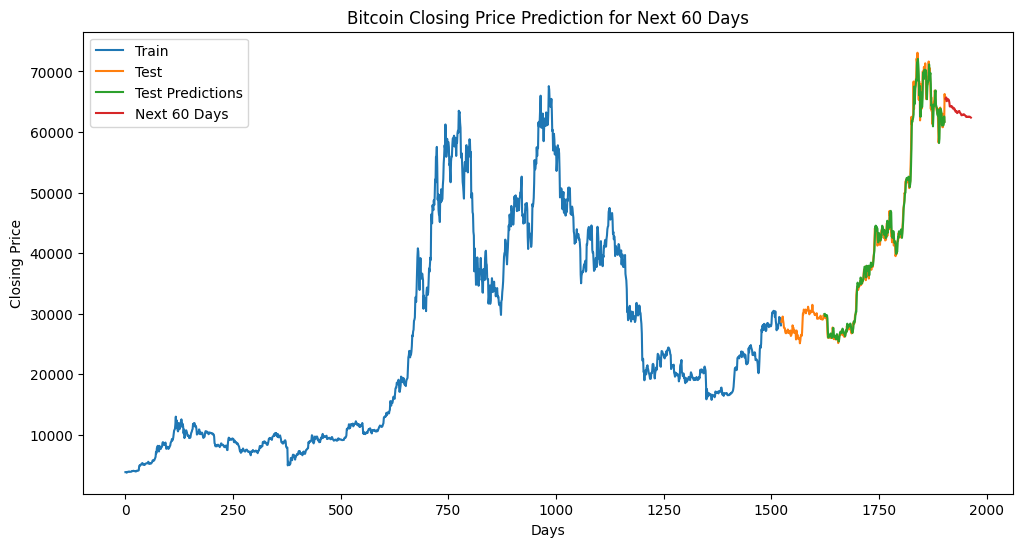

Predicted closing prices for the next 60 days:
[65487.76  65653.83  65693.836 65078.61  65207.785 65402.234 65264.91
 65359.08  65241.56  64877.836 64214.504 64247.062 64244.72  64241.492
 64131.473 64240.508 64091.473 63873.742 64012.89  63960.688 63931.695
 63651.594 63704.73  63392.5   63329.348 63407.195 63428.95  63113.54
 63143.473 63303.508 63315.03  63438.406 63471.277 63302.598 63141.156
 63073.37  62963.273 62773.44  62758.457 62823.297 62868.664 62807.43
 62902.92  62918.484 62834.926 62792.56  62691.258 62595.27  62497.027
 62547.844 62489.066 62482.98  62528.125 62542.773 62477.375 62472.67
 62542.535 62482.492 62429.88  62378.254]


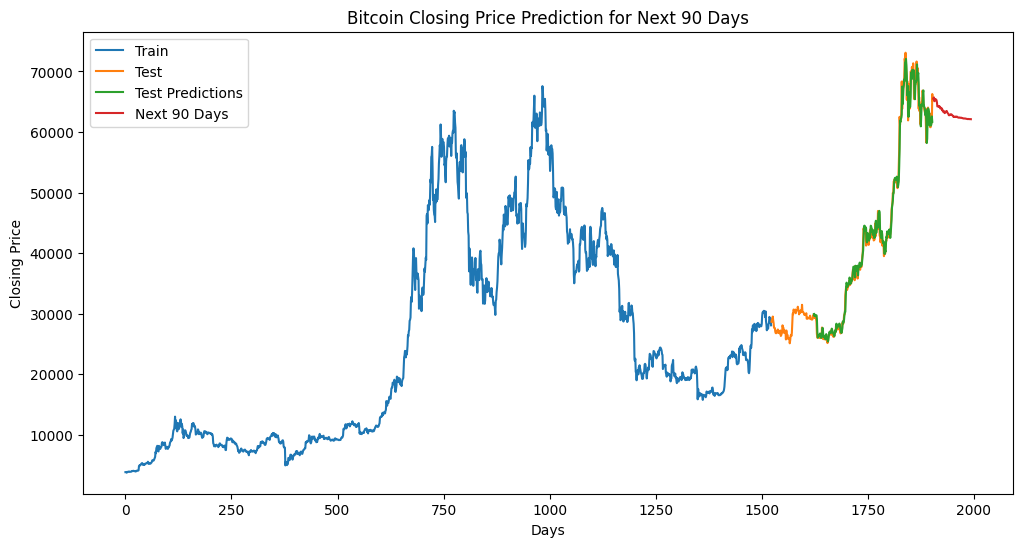

Predicted closing prices for the next 90 days:
[65487.76  65653.83  65693.836 65078.61  65207.785 65402.234 65264.91
 65359.08  65241.56  64877.836 64214.504 64247.062 64244.72  64241.492
 64131.473 64240.508 64091.473 63873.742 64012.89  63960.688 63931.695
 63651.594 63704.73  63392.5   63329.348 63407.195 63428.95  63113.54
 63143.473 63303.508 63315.03  63438.406 63471.277 63302.598 63141.156
 63073.37  62963.273 62773.44  62758.457 62823.297 62868.664 62807.43
 62902.92  62918.484 62834.926 62792.56  62691.258 62595.27  62497.027
 62547.844 62489.066 62482.98  62528.125 62542.773 62477.375 62472.67
 62542.535 62482.492 62429.88  62378.254 62373.74  62353.918 62391.
 62386.605 62340.55  62338.848 62358.465 62342.65  62300.926 62298.137
 62274.496 62233.23  62231.82  62238.15  62231.652 62211.31  62225.668
 62204.363 62183.19  62165.41  62158.105 62132.61  62136.223 62152.277
 62134.746 62120.93  62128.668 62135.13  62118.363 62111.36 ]


In [13]:
# 13. Dự đoán cho 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

     # Vẽ hình
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred_test)), y_pred_test, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **Chia train test theo tỉ lệ 7:3**

In [14]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('BTC.csv')
df1=df.reset_index()['Close']

In [15]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [17]:
# 5. Hàm Create Dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [18]:
# 6. Reshape thành X=t,t+1,t+2..t+99  Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [19]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [20]:
# 8. Define SimpleRNN Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [21]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
20/20 [==============================] - 2s 56ms/step - loss: 0.1011 - val_loss: 0.0075
Epoch 2/100
20/20 [==============================] - 1s 43ms/step - loss: 0.0031 - val_loss: 0.0017
Epoch 3/100
20/20 [==============================] - 1s 41ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 4/100
20/20 [==============================] - 1s 45ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 5/100
20/20 [==============================] - 1s 33ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 6/100
20/20 [==============================] - 0s 23ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 7/100
20/20 [==============================] - 0s 25ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 8/100
20/20 [==============================] - 1s 34ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 9/100
20/20 [==============================] - 1s 26ms/step - loss: 0.0010 - val_loss: 9.8579e-04
Epoch 10/100
20/20 [==============================] - 0s 23ms/step - loss: 9.8413e-04 - val_loss

In [22]:
# 10. Dự báo dữ liệu train, test
train_predict = model.predict(X_train)
y_pred_test = model.predict(X_test)

15/15 [==============================] - 0s 12ms/step


In [23]:
# 11. Chuẩn hóa dữ liệu
train_predict = scaler.inverse_transform(train_predict)
y_pred_test = scaler.inverse_transform(y_pred_test)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [24]:
# 12. Đánh giá độ chính xác thuật toán
test_mae = mean_absolute_error(y_pred_test, y_test)
test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred_test, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 1034.8898369134818
Testing RMSE: 1368.1542050426224
Testing MAPE: 0.02750867809308517


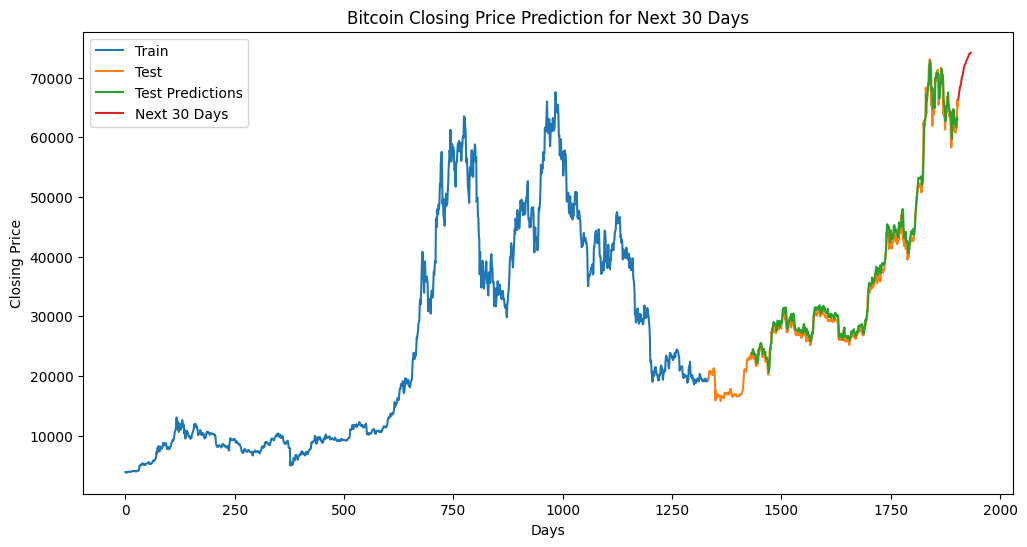

Predicted closing prices for the next 30 days:
[66283.42  66686.9   67496.7   67801.73  68410.125 68433.76  68889.77
 69293.28  69831.35  70204.266 70343.484 70652.164 71262.266 71532.234
 71862.586 72156.46  72285.914 72389.64  72590.4   72838.41  72995.945
 73176.37  73365.43  73531.83  73682.81  73946.484 73967.945 73972.37
 74085.85  74163.87 ]


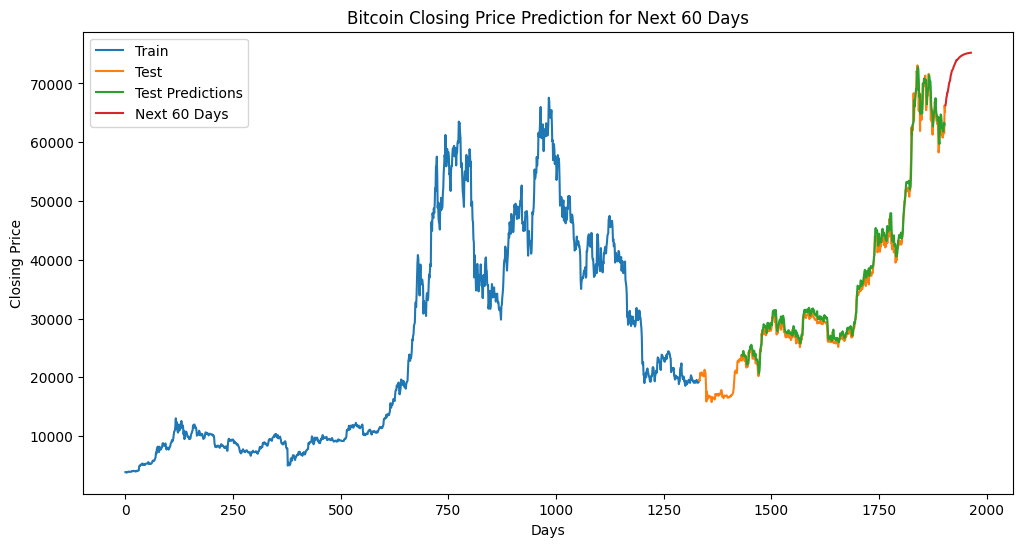

Predicted closing prices for the next 60 days:
[66283.42  66686.9   67496.7   67801.73  68410.125 68433.76  68889.77
 69293.28  69831.35  70204.266 70343.484 70652.164 71262.266 71532.234
 71862.586 72156.46  72285.914 72389.64  72590.4   72838.41  72995.945
 73176.37  73365.43  73531.83  73682.81  73946.484 73967.945 73972.37
 74085.85  74163.87  74232.445 74327.95  74405.08  74480.555 74536.914
 74604.76  74658.234 74698.484 74741.055 74802.03  74824.164 74860.55
 74915.02  74936.6   74963.62  74994.42  75029.766 75042.87  75063.79
 75090.1   75108.984 75124.29  75141.586 75155.53  75162.734 75179.14
 75193.42  75204.35  75214.5   75226.37 ]


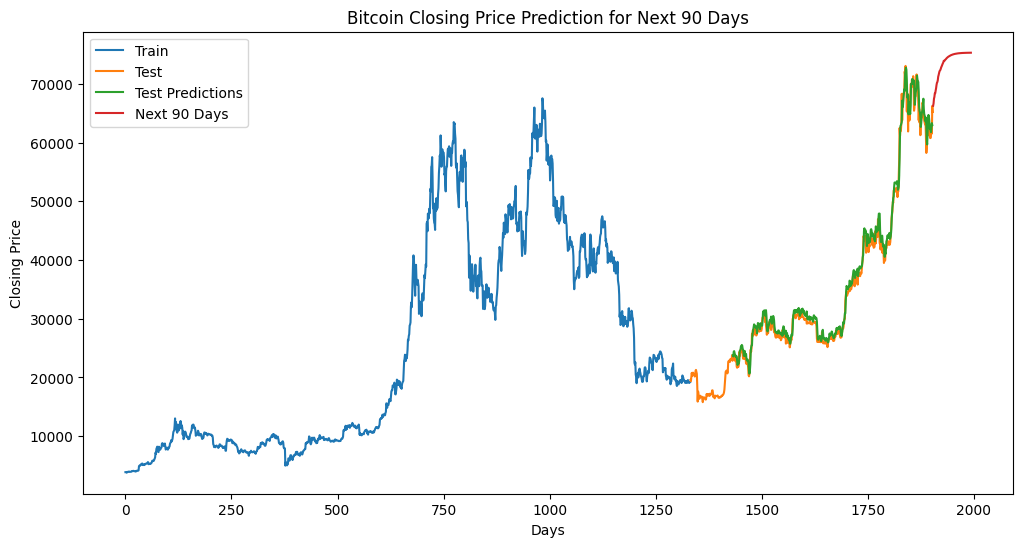

Predicted closing prices for the next 90 days:
[66283.42  66686.9   67496.7   67801.73  68410.125 68433.76  68889.77
 69293.28  69831.35  70204.266 70343.484 70652.164 71262.266 71532.234
 71862.586 72156.46  72285.914 72389.64  72590.4   72838.41  72995.945
 73176.37  73365.43  73531.83  73682.81  73946.484 73967.945 73972.37
 74085.85  74163.87  74232.445 74327.95  74405.08  74480.555 74536.914
 74604.76  74658.234 74698.484 74741.055 74802.03  74824.164 74860.55
 74915.02  74936.6   74963.62  74994.42  75029.766 75042.87  75063.79
 75090.1   75108.984 75124.29  75141.586 75155.53  75162.734 75179.14
 75193.42  75204.35  75214.5   75226.37  75235.45  75240.125 75248.15
 75256.555 75261.59  75266.6   75273.37  75279.164 75283.1   75288.81
 75292.445 75295.6   75298.77  75302.86  75305.1   75307.47  75311.06
 75313.6   75315.53  75317.66  75319.98  75321.19  75322.94  75324.95
 75326.16  75327.27  75328.8   75330.06  75330.76  75332.05 ]


In [25]:
# 13. Dự đoán cho 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

     # Vẽ hình
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred_test)), y_pred_test, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **Chia train test theo tỉ lệ 6:4**

In [26]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('BTC.csv')
df1=df.reset_index()['Close']

In [27]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [28]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [29]:
# 5. Hàm Create Dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [30]:
# 6. Reshape thành X=t,t+1,t+2..t+99  Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [31]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [32]:
# 8. Define SimpleRNN Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [33]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
17/17 [==============================] - 2s 44ms/step - loss: 0.0124 - val_loss: 0.0020
Epoch 2/100
17/17 [==============================] - 0s 25ms/step - loss: 0.0011 - val_loss: 6.0344e-04
Epoch 3/100
17/17 [==============================] - 0s 27ms/step - loss: 8.5130e-04 - val_loss: 5.6134e-04
Epoch 4/100
17/17 [==============================] - 0s 25ms/step - loss: 8.5692e-04 - val_loss: 5.2389e-04
Epoch 5/100
17/17 [==============================] - 0s 27ms/step - loss: 7.7365e-04 - val_loss: 4.9930e-04
Epoch 6/100
17/17 [==============================] - 1s 38ms/step - loss: 7.8392e-04 - val_loss: 5.7723e-04
Epoch 7/100
17/17 [==============================] - 1s 45ms/step - loss: 7.0435e-04 - val_loss: 7.6464e-04
Epoch 8/100
17/17 [==============================] - 1s 45ms/step - loss: 7.4720e-04 - val_loss: 4.6738e-04
Epoch 9/100
17/17 [==============================] - 1s 45ms/step - loss: 6.8737e-04 - val_loss: 5.7949e-04
Epoch 10/100
17/17 [====================

In [34]:
# 10. Dự báo dữ liệu train, test
train_predict = model.predict(X_train)
y_pred_test = model.predict(X_test)

21/21 [==============================] - 0s 7ms/step


In [35]:
# 11. Chuẩn hóa dữ liệu
train_predict = scaler.inverse_transform(train_predict)
y_pred_test = scaler.inverse_transform(y_pred_test)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [36]:
# 12. Đánh giá độ chính xác thuật toán
test_mae = mean_absolute_error(y_pred_test, y_test)
test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred_test, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 697.5072761124242
Testing RMSE: 1110.4814422524362
Testing MAPE: 0.020730574549497918


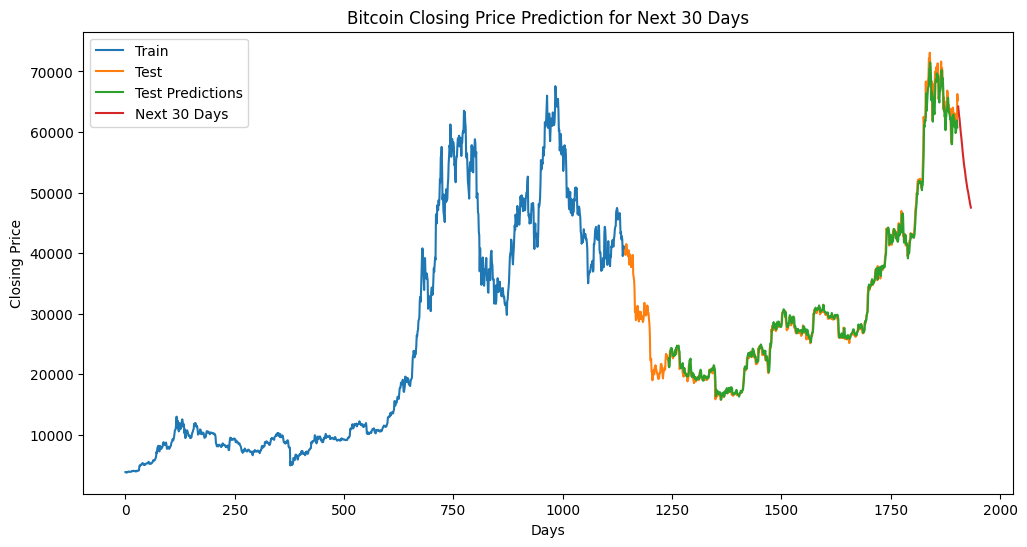

Predicted closing prices for the next 30 days:
[64203.535 63497.51  62700.64  62176.844 61344.85  60601.836 59809.117
 59223.227 58433.94  57760.85  56896.31  56188.844 55543.004 54797.2
 54261.387 53816.57  53269.082 52582.25  52108.867 51622.457 51151.35
 50612.453 50337.492 49960.5   49496.402 49044.17  48699.32  48195.9
 47863.188 47516.81 ]


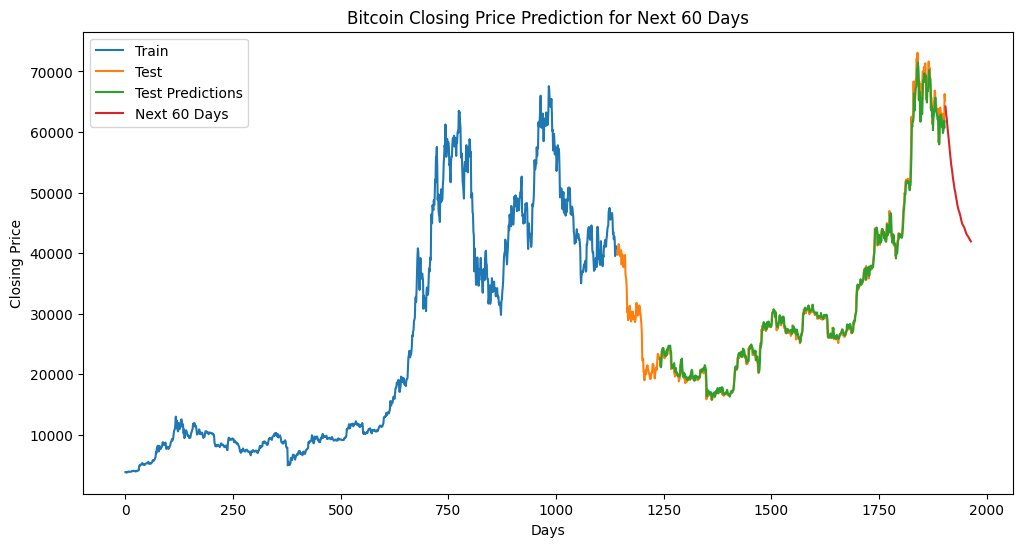

Predicted closing prices for the next 60 days:
[64203.535 63497.51  62700.64  62176.844 61344.85  60601.836 59809.117
 59223.227 58433.94  57760.85  56896.31  56188.844 55543.004 54797.2
 54261.387 53816.57  53269.082 52582.25  52108.867 51622.457 51151.35
 50612.453 50337.492 49960.5   49496.402 49044.17  48699.32  48195.9
 47863.188 47516.81  47207.062 47006.035 46811.98  46570.5   46290.375
 46032.344 45639.15  45345.07  45079.668 44871.773 44662.637 44574.414
 44447.58  44343.004 44142.992 43951.766 43710.52  43509.383 43289.188
 43142.18  43001.7   42900.656 42795.113 42707.1   42560.184 42436.
 42298.184 42154.55  42037.1   41940.965]


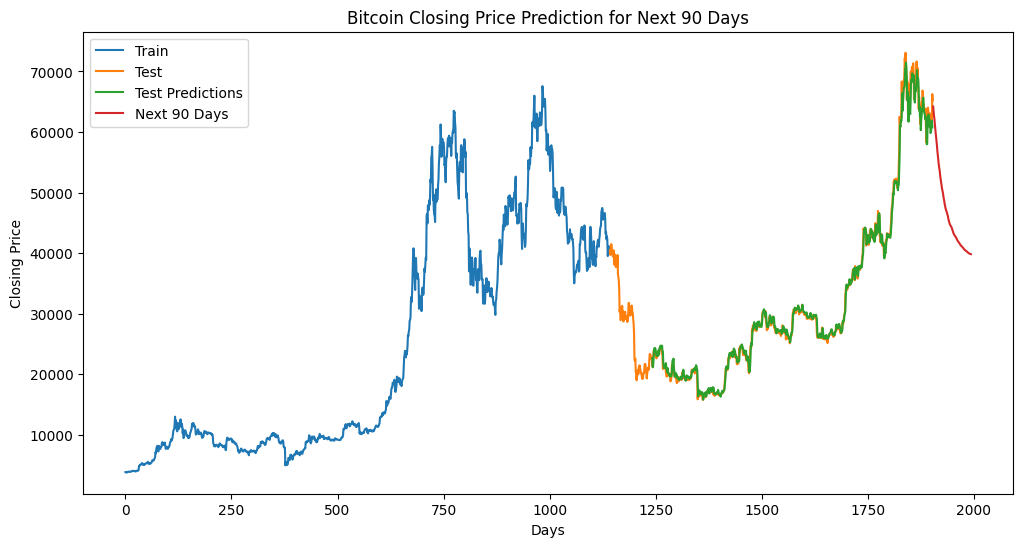

Predicted closing prices for the next 90 days:
[64203.535 63497.51  62700.64  62176.844 61344.85  60601.836 59809.117
 59223.227 58433.94  57760.85  56896.31  56188.844 55543.004 54797.2
 54261.387 53816.57  53269.082 52582.25  52108.867 51622.457 51151.35
 50612.453 50337.492 49960.5   49496.402 49044.17  48699.32  48195.9
 47863.188 47516.81  47207.062 47006.035 46811.98  46570.5   46290.375
 46032.344 45639.15  45345.07  45079.668 44871.773 44662.637 44574.414
 44447.58  44343.004 44142.992 43951.766 43710.52  43509.383 43289.188
 43142.18  43001.7   42900.656 42795.113 42707.1   42560.184 42436.
 42298.184 42154.55  42037.1   41940.965 41816.363 41726.934 41633.215
 41519.4   41406.867 41315.574 41223.96  41144.33  41079.133 41008.3
 40924.875 40842.598 40749.52  40651.195 40568.402 40500.75  40438.996
 40401.727 40357.54  40307.59  40249.016 40178.566 40105.85  40040.926
 39982.152 39943.18  39915.02  39891.695 39866.91  39835.64 ]


In [37]:
# 13. Dự đoán cho 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

     # Vẽ hình
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred_test)), y_pred_test, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())